In [ ]:
#%pip install --upgrade hyperspectral_gta_data

In [1]:
# Common useful packages
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import copy
import spectral

# module that is useful for reloading packages
import importlib

# Scripts associated with the SML4SI textbook
import hyperspectral_gta_data as hsi_data
import hsi_classification as hc


# Part 1: Open the image and load the data as a numpy array.

In [3]:
hsi_data.set_data_dir('/workspaces/Machine-Learning-for-Spectral-Imaging/spectral_data/')

# Here are the datasets available through the hyperspectral_gta_data package
hsi_data.available_datasets()
print(' ')

# To download and use the polymers image:
hd = hsi_data.download('MicroscenePolymers')
fname = hsi_data.get_fname('MicroscenePolymers')

Available Images:
   WashingtonDC
   MicroscenePolymers
   Detection_Imagery_Cooke_City_RIT
   VegBaccharisUPWINS
   PaintDetectionUPWINS
   indian_pines
   pavia_centre
   pavia_university
Available Spectral Libraries:
   GHISACONUS_2008_001_speclib
   Microscene_Polymers_Library
   UPWINS_4_16_2024
   Detection_Library_Cooke_City_RIT
 


Downloading...
From (original): https://drive.google.com/uc?id=1SjIToGJwkkWyBZER5Wv-1v1-I22Y-EBI
From (redirected): https://drive.google.com/uc?id=1SjIToGJwkkWyBZER5Wv-1v1-I22Y-EBI&confirm=t&uuid=edfcdeb0-5653-4970-ba0a-ea537b21f6e8
To: /workspaces/Machine-Learning-for-Spectral-Imaging/spectral_data/spectral_images/Microscene_Polymers.zip
100%|██████████| 558M/558M [00:13<00:00, 41.8MB/s] 


File saved as: /workspaces/Machine-Learning-for-Spectral-Imaging/spectral_data/spectral_images/Microscene_Polymers/reflectance_image_polymers
File saved as: /workspaces/Machine-Learning-for-Spectral-Imaging/spectral_data/spectral_images/Microscene_Polymers/reflectance_image_polymers.hdr
 
Available Files:
/workspaces/Machine-Learning-for-Spectral-Imaging/spectral_data/spectral_images/Microscene_Polymers/reflectance_image_polymers.hdr
/workspaces/Machine-Learning-for-Spectral-Imaging/spectral_data/spectral_images/Microscene_Polymers/reflectance_image_polymers
Primary Image Filename:
/workspaces/Machine-Learning-for-Spectral-Imaging/spectral_data/spectral_images/Microscene_Polymers/reflectance_image_polymers


In [4]:
# Open the image and read into an array
im = spectral.envi.open(fname+'.hdr', fname)
wl = np.asarray(im.bands.centers)
# Load the image into memory
im.Arr = im.load()
print(f'Shape of Im.Arr = {im.Arr.shape}')
im.List = np.reshape(im.Arr, (im.nrows*im.ncols, im.nbands))
print(f'Shape of im.List = {im.List.shape}')

Shape of Im.Arr = (852, 384, 452)
Shape of im.List = (327168, 452)


Loading groundtruth...
Name: surge_protector_hard
Index: 0
Number of points: 1501
 
Name: ping_pong_ball
Index: 1
Number of points: 320
 
Name: red_lid
Index: 2
Number of points: 7371
 
Name: medicine_bottle_cap
Index: 3
Number of points: 252
 
Name: plastic_bottle
Index: 4
Number of points: 2862
 
Name: red_bubble_wrap
Index: 5
Number of points: 16756
 
Name: clear_bubble_wrap
Index: 6
Number of points: 9997
 
Name: PVC_plumbing_pipe
Index: 7
Number of points: 6765
 
Name: polymer_football
Index: 8
Number of points: 5503
 
Name: glove
Index: 9
Number of points: 2759
 
Name: foil_bag
Index: 10
Number of points: 7807
 
Name: foam_packaging
Index: 11
Number of points: 21831
 
Total time: 0.20 seconds
Training...
Total time: 0.47 seconds
Predicting...
Total time: 11.86 seconds


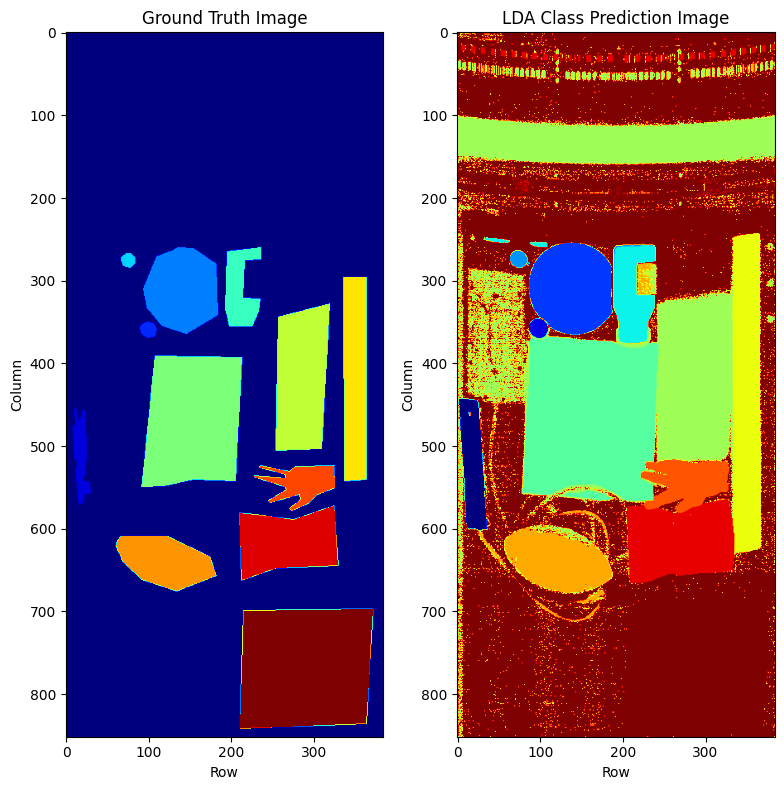

In [5]:
importlib.reload(hc)
fdir = '/workspaces/Machine-Learning-for-Spectral-Imaging/Book_Modules/'

# load the image data
cl = hc.GaussianClassification(im)

# load the ground truth data
fname = fdir+'ground_truth_images/reflectance_image_polymers_surfaces.txt'
cl.load_gt(fname, verbose=True)

# train the classifiers (compute means and states)
cl.train(verbose=True)

# predict class labels
cl.predict(verbose=True)

cl.plot_class_sideBySide(fs=8)

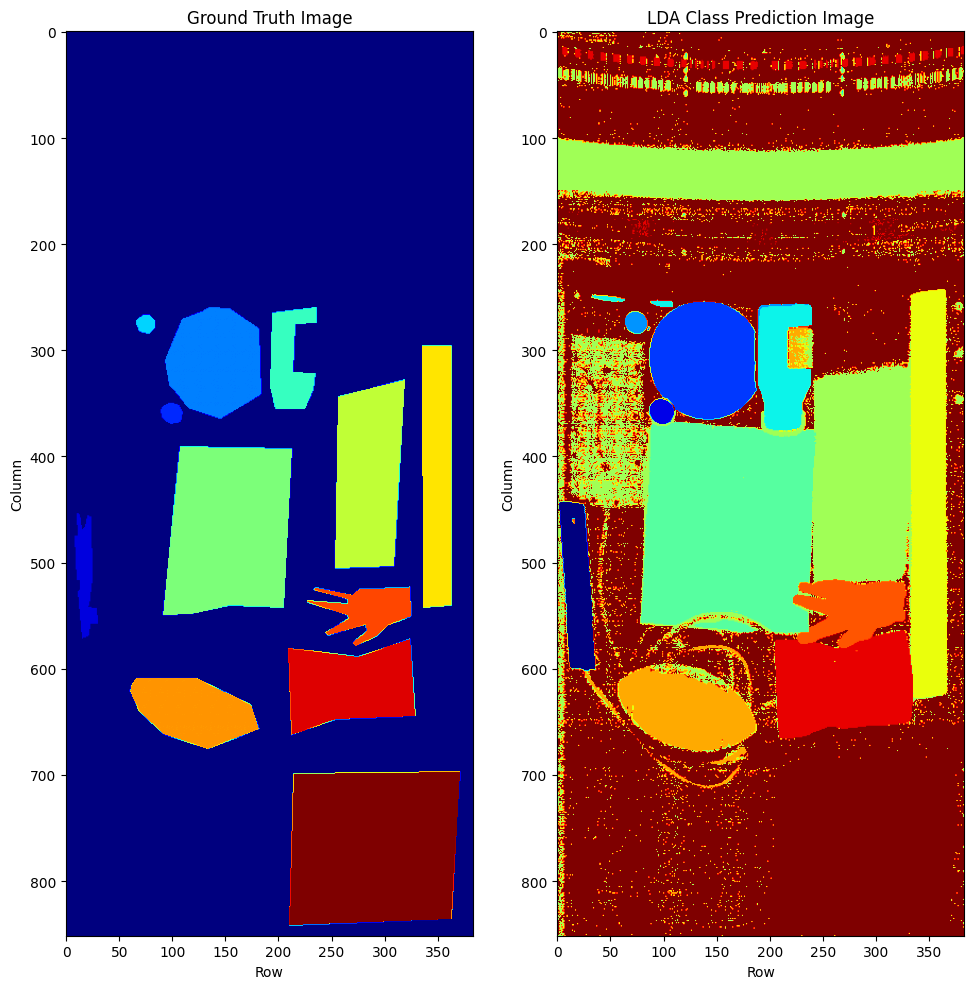

In [6]:
cl.plot_class_sideBySide()

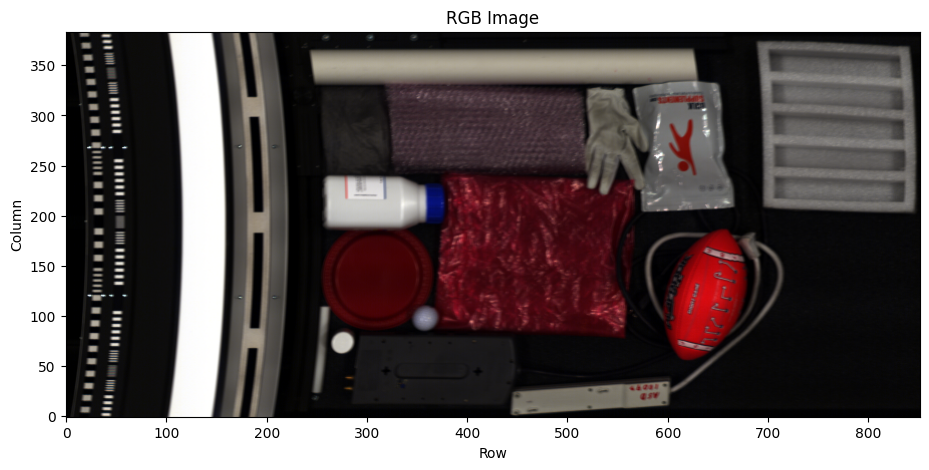

In [42]:
cl.plot_RGB()

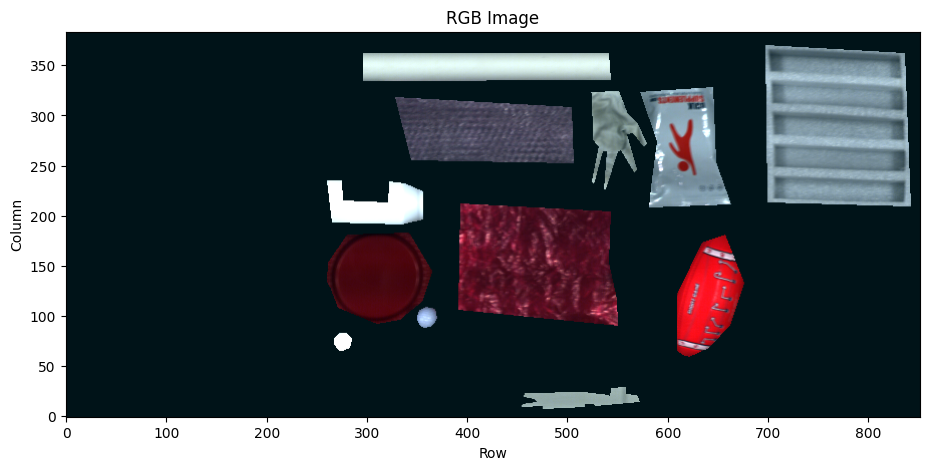

In [43]:
cl.plt_RGB_classes()

# PART 2: Viewing a scatterplot of the hyperspectral image.

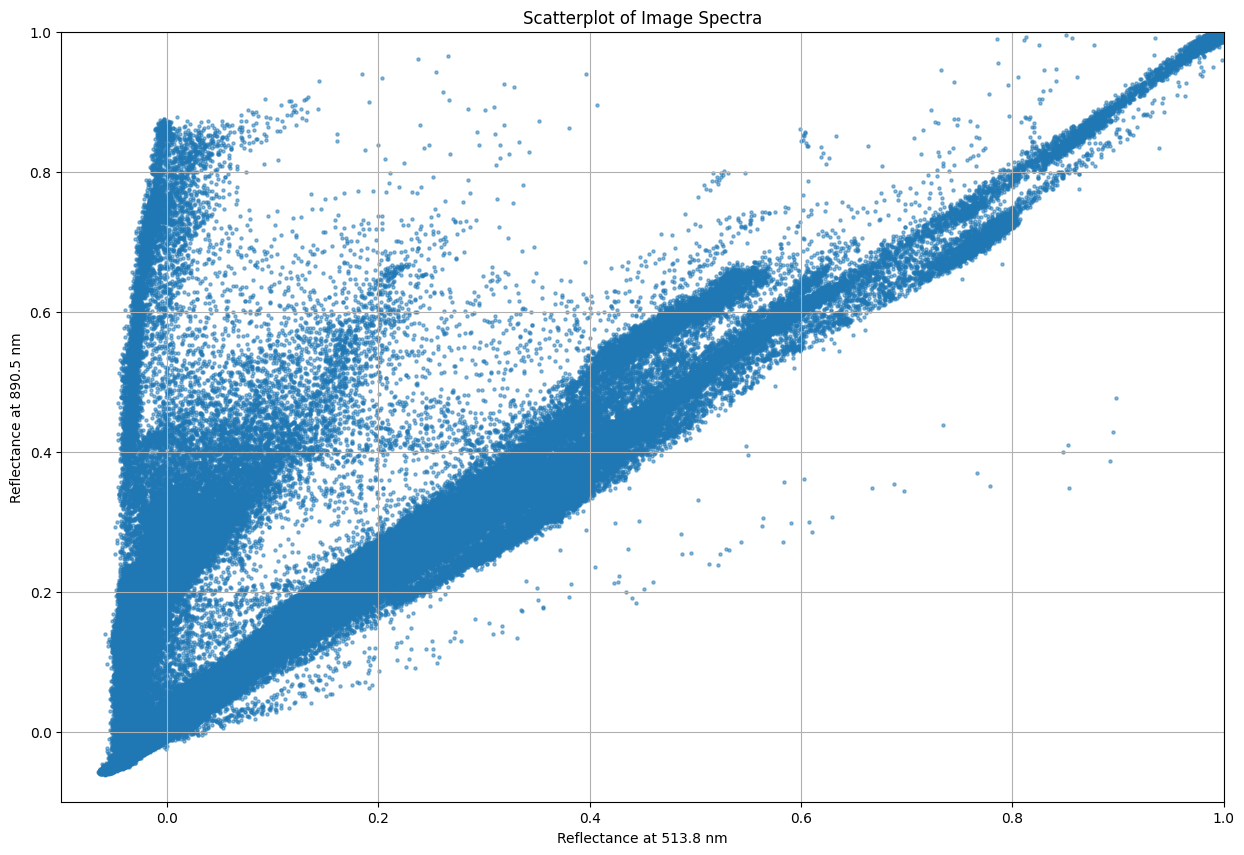

In [44]:
cl.plt_scatter()
plt.xlim([-0.1,1])
plt.ylim([-0.1,1]);

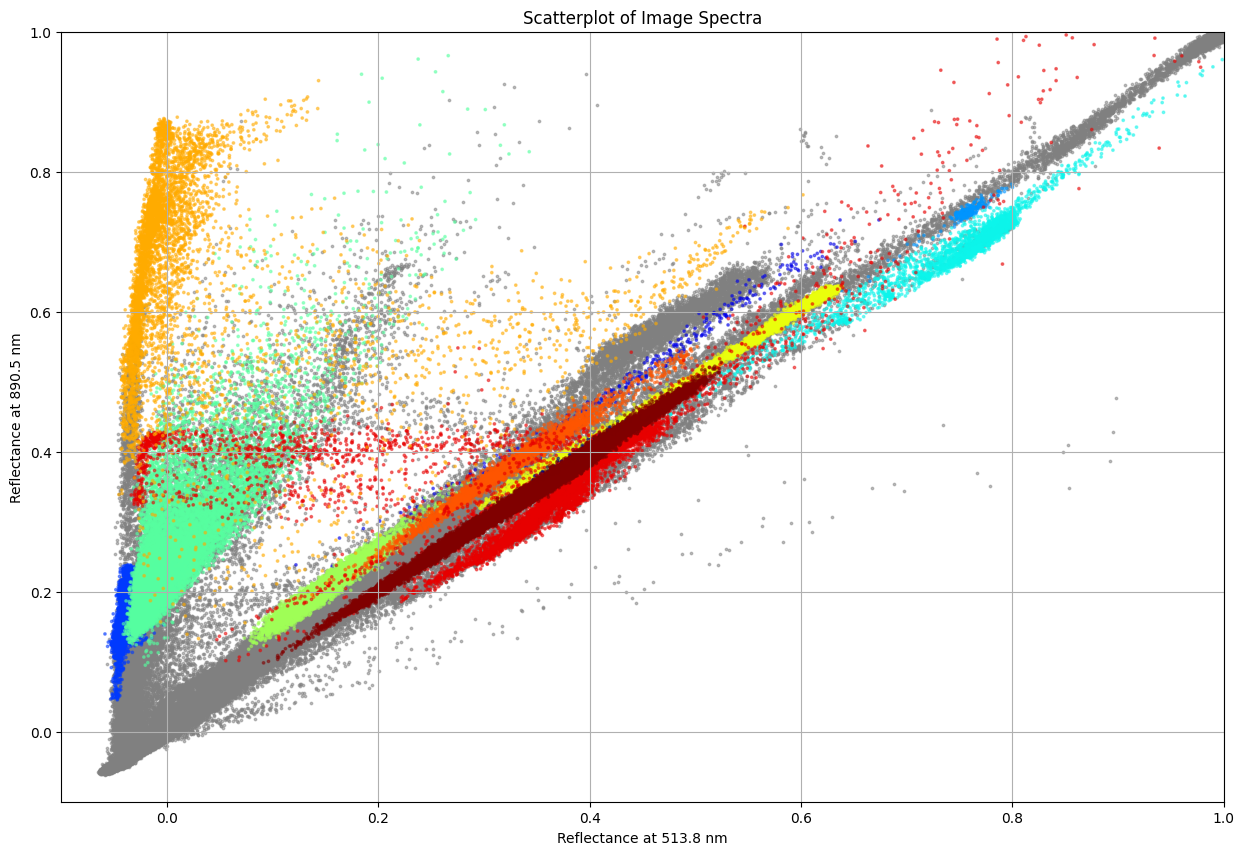

In [45]:
cl.plt_scatter_gt()
plt.xlim([-0.1,1])
plt.ylim([-0.1,1]);

# Part 3: Examining Individual Classes

In [46]:
cl.class_names

['surge_protector_hard',
 'ping_pong_ball',
 'red_lid',
 'medicine_bottle_cap',
 'plastic_bottle',
 'red_bubble_wrap',
 'clear_bubble_wrap',
 'PVC_plumbing_pipe',
 'polymer_football',
 'glove',
 'foil_bag',
 'foam_packaging']

##  Part 4: Examining the means and covariances:

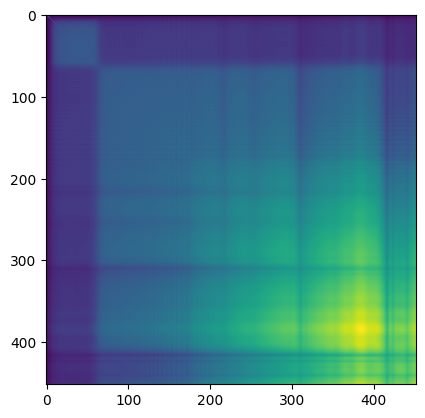

In [47]:
plt.imshow(cl.C);

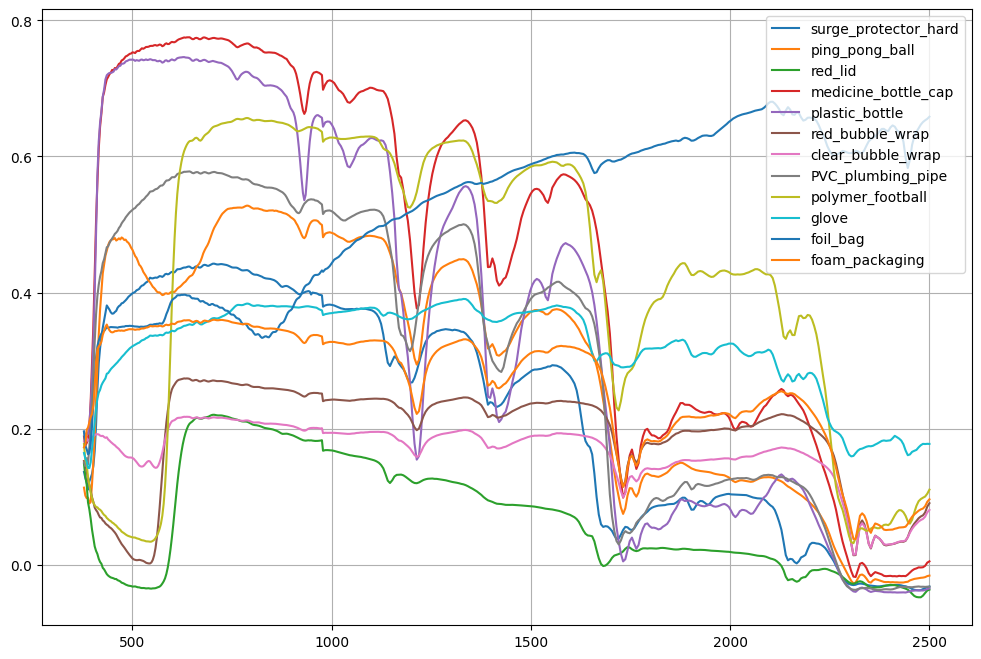

In [48]:
cl.plt_class_means()

In [18]:
import sys
sys.path.append('/workspaces/Machine-Learning-for-Spectral-Imaging/Book_Modules/')

import importlib
from hsiViewer import hsi_viewer_layers as hvl
importlib.reload(hvl)
layers = {
    'Ground Truth': cl.gt_im,
    'LDA Classification': cl.LDA_class_image
}
hvl.viewer(im, layers)